# Video Games Dataset 

## This Notebook is for exploring capabilities of langchain --> pandas compatible agents
* YT video that provided pattern for using langchain agent: [[video]](https://www.youtube.com/watch?v=rFQ5Kmkd4jc) 
* Source file for the Games DF: [[source]](https://corgis-edu.github.io/corgis/csv/video_games/)

In [2]:
from Functions.General_Func import print_X, delete_variables
from Functions.Plt_helpers import add_data_label

print_X("My functions imported")

==================== My functions imported ====================


In [3]:
import pandas as pd
from matplotlib import pyplot as plt

from langchain.chat_models import ChatOpenAI
from langchain.agents import create_pandas_dataframe_agent

print_X("General modules imported")


================== General modules imported ==================


## 1️⃣ Loading Games Dataset, .info(), .describe()

In [4]:
print_X('Function to group platforms')

trimed_platforms = ['Nintendo', 'PlayStation', 'Dreamcast','Xbox', 'Wii', 'PC', 'Switch', 'GameCube', 'Game Boy', '3DS', 'DS', 'PSP', 'Stadia']

def trim_platforms(platform):
    """This function is designed to clean up platform names by 'mapping' them down to one of the pre-defined options. If part of raw name matches 'general' name this 'general' name will be returned, otherwise initial name will be returned."""
    for p in trimed_platforms:
        if p.lower() in platform.lower():
            return p
    return platform


================= Function to group platforms =================


In [5]:
print_X("Reading DataFrame + Applying primary transformations and cleaning")

df_games = (
    pd.read_csv('./data/all_games.csv', parse_dates=['release_date']).
    assign(
        release_year    =   lambda x: x['release_date'].dt.year,
        release_quarter =   lambda x: x['release_date'].dt.quarter,
        resase_month    =   lambda x: x['release_date'].dt.month,
        platform_G      =   lambda x: x['platform'].apply(trim_platforms).astype('category'),
        platform        =   lambda x: x['platform'].astype('category'),
        meta_score      =   lambda x: x['meta_score'].fillna(0).astype('int'),
        # df_games['user_review'] contains string values that can be converted to float and some 'tbd' values that cannot be
        user_review     =   lambda x: pd.to_numeric(x['user_review'], errors='coerce').astype('float')
    )
        .drop(columns=['summary',  'release_date'])
        .set_index('name')
)

df_games[:3]

=== Reading DataFrame + Applying primary transformations and cleaning ===


,platform,meta_score,user_review,release_year,release_quarter,resase_month,platform_G
name,,,,,,,
The Legend of Zelda: Ocarina of Time,Nintendo 64,99,9.1,1998,4,11,Nintendo
Tony Hawk's Pro Skater 2,PlayStation,98,7.4,2000,3,9,PlayStation
Grand Theft Auto IV,PlayStation 3,98,7.7,2008,2,4,PlayStation


In [6]:
print_X('DataFrame info')
df_games.info()

======================= DataFrame info =======================
<class 'pandas.core.frame.DataFrame'>
Index: 18800 entries, The Legend of Zelda: Ocarina of Time to Leisure Suit Larry: Box Office Bust
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   platform         18800 non-null  category
 1   meta_score       18800 non-null  int32   
 2   user_review      17435 non-null  float64 
 3   release_year     18800 non-null  int64   
 4   release_quarter  18800 non-null  int64   
 5   resase_month     18800 non-null  int64   
 6   platform_G       18800 non-null  category
dtypes: category(2), float64(1), int32(1), int64(3)
memory usage: 845.9+ KB


In [7]:
df_games['user_review'].isna().sum()

1365

these `1365` are 'tbd' records, that were replaced with NaNs. So they can be dropped without any harm to the data.

In [8]:
df_games.dropna(inplace=True)

2️⃣ Firts analysis by Yeard and Brands

2️⃣-1 Games release by Years

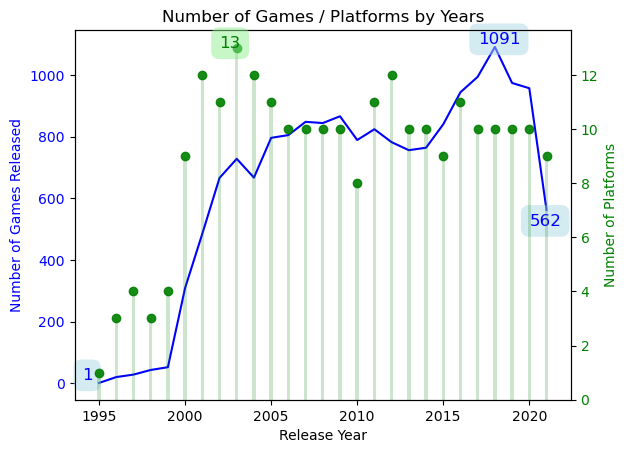

In [63]:
fig, ax1 = plt.subplots()

# plot the first series on ax1
ax1.plot(df_games['release_year'].value_counts().sort_index(), color='b')
ax1.set_xlabel('Release Year')
ax1.set_ylabel('Number of Games Released', color='b')

# set the y-axis scale for ax1
ax1.tick_params(axis='y', labelcolor='b')

# create a second y-axis with a different scale
ax2 = ax1.twinx()

# plot the second series on ax2 as a bar chart
ax2.bar(df_games.groupby('release_year').count().index, 
        df_games.groupby('release_year')['platform_G'].nunique(),
        color='g', width=0.2, alpha=0.2)
ax2.plot(df_games.groupby('release_year')['platform_G'].nunique(),
        color='g', alpha=0.9, marker='o', linestyle='None')
ax2.set_ylabel('Number of Platforms', color='g')
ax2.set_title("Number of Games / Platforms by Years")

# set the y-axis scale for ax2
ax2.tick_params(axis='y', labelcolor='g') 

# Annotating ## found to be too verbose for easy coding
val_counts_by_years = df_games['release_year'].value_counts().sort_index()

max_value_games, max_year_games = (    val_counts_by_years.max(), val_counts_by_years.idxmax() )
min_value_games, min_year_games = (    val_counts_by_years.min(), val_counts_by_years.idxmin() )
last_value_games, last_year_games = (    val_counts_by_years.iloc[-1], val_counts_by_years.index[-1] )

max_value_platforms, max_year_platforms = (   df_games.groupby('release_year')['platform_G'].nunique().max(),
                                                df_games.groupby('release_year')['platform_G'].nunique().idxmax()   )

add_data_label(plot=ax1,  x=max_year_games, y=max_value_games, backgrColor='lightblue', fontColor='blue')
add_data_label(plot=ax1,  x=min_year_games, y=min_value_games, backgrColor='lightblue', fontColor='blue')
add_data_label(plot=ax1,  x=last_year_games, y=last_value_games, shift_y=-60, backgrColor='lightblue', fontColor='blue')

add_data_label(plot=ax2,  x=max_year_platforms, y=max_value_platforms, backgrColor='lightgreen', fontColor='green', shift_y=-10)